In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
import sqlite3 as db
import matplotlib.pyplot as pp

In [2]:
github_userName = 'Tanag3r'
ebird_token = 'j6c7l80ga2ib'
db_name = 'trailheadDirectBirds_sous.db'

In [3]:
##connect to database
def connectDB():
    try:
        cnx = db.connect(db_name)
    except Exception as cnxError:
        raise UserWarning(f'Unable to connect to database due to: {cnxError}')
    return cnx

In [57]:
def weeklyAbundance():
    cnx = connectDB()
    try:
        ObsDataset = pd.read_sql('SELECT comName,locId,obsDt,howMany,subId FROM historicObservations WHERE comName == "Canada Jay";',con=cnx,parse_dates=['obsDt']) #Canada Jay filter is for testing purposes only
        ObsDataset['obsDt_week'] = ObsDataset['obsDt'].dt.isocalendar().week
        #group up data
        ObsDataset = ObsDataset.groupby(['comName','locId','obsDt_week'])['howMany'].median()
        ObsDataset = pd.DataFrame(ObsDataset)
        ObsDataset['relativeAbundance'] = ObsDataset['howMany']/ObsDataset['howMany'].mean()
        ObsDataset.sort_values(by=['comName','obsDt_week'],ascending=True,inplace=True)   #not needed
        ObsDataset.reset_index(inplace=True)   #not needed
    except Exception as calcEx:
        raise UserWarning(calcEx)
    return ObsDataset

In [58]:
trx = weeklyAbundance()
trx

,comName,locId,obsDt_week,howMany,relativeAbundance
0,Canada Jay,L8312096,1,1.0,0.282051
1,Canada Jay,L12172834,10,6.0,1.692308
2,Canada Jay,L12172834,11,2.0,0.564103
3,Canada Jay,L10129014,13,4.0,1.128205
4,Canada Jay,L12172834,40,7.0,1.974359
5,Canada Jay,L12172834,49,2.0,0.564103
6,Canada Jay,L8312096,49,1.0,0.282051
7,Canada Jay,L12172834,52,4.0,1.128205
8,Canada Jay,L424117,52,3.0,0.846154
9,Canada Jay,L8312096,52,1.0,0.282051


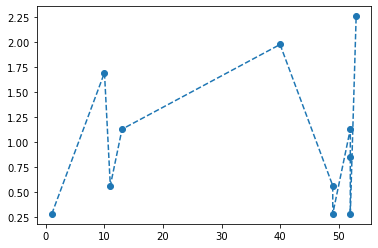

In [59]:
##TODO #67 interpolate sighting values into the test Canada Jay dataset
xdata = trx['obsDt_week']
ydata = trx['relativeAbundance']

pp.plot(xdata,ydata,'--o')

In [ ]:
##TODO #66 split out birds into quartiles based on the number of observations available and the YOY frequency. Results will determine the strength of forecasting required

In [ ]:
##TODO #64 using the relative abundance value from weeklyAbundance(), write a function that returns FAO land coverage preference

In [ ]:
##TODO #65 using historic habitat preference data, forecast the seasonal habitat preference for each species of bird